# Handwritten Digit Recognition Project 🚀

Welcome to our exciting journey into the world of Deep Learning! In this project, you'll dive into the fascinating realm of handwritten digit recognition using PyTorch, one of the most popular deep learning libraries. 🧠💻

## Project Overview 📝

Your mission, should you choose to accept it, involves building and optimizing a PyTorch model to recognize handwritten digits from the MNIST dataset. This dataset is like the 'Hello World' of machine learning, perfect for beginners and yet intriguing for experienced coders. 🌟

## Learning Objectives 🎯

- **Understanding PyTorch**: Get hands-on experience with PyTorch, understanding its basic operations and how to build models with it.
- **Model Optimization**: Explore various training optimization techniques such as adding dropout layers, implementing regularizers, and utilizing early stopping to enhance model performance.
- **Experimentation**: Test different hyperparameters and observe how they impact your model's learning process and accuracy.

## Project Structure 🗂️

- **Data Preprocessing**: Learn how to prepare your data for optimal model training.
- **Model Building**: Design a neural network architecture suitable for digit recognition.
- **Training and Testing**: Implement the training loop, and test your model's performance.
- **Optimization Techniques**: Apply different optimization strategies to improve your model.

## TODOs 📌

Throughout this notebook, you'll find `TODO` sections. These are areas where you'll need to apply what you've learned and write your own code. Don't worry, though; guidance and hints are provided to help you on your journey!

So, are you ready to embark on this adventure in deep learning? Let's get started! 🚀👩‍💻👨‍💻

---

Remember, the goal of this project is not just to build a model but to experiment and learn. Every challenge you encounter is an opportunity to grow. Let's do this! 💪


## Loading the MNIST Dataset 📚

Before diving into the model building, the first crucial step is to load our dataset. In this section, you'll learn how to load and visualize the MNIST dataset, which is a collection of 70,000 grayscale images of handwritten digits (0 through 9). This dataset is widely used for training and testing in the field of deep learning. 🤖📈



In [23]:
# Import necessary libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# TODO: Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# TODO: Load the MNIST dataset
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# TODO: Create data loaders
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

In [24]:
# TODO: Figure out how many images are in the train_set and test_set.
print(f'Number of images in the train set is: {len(train_set)} \n')
print(f'Number of images in the test set is: {len(test_set)}\n')

Number of images in the train set is: 60000 

Number of images in the test set is: 10000



## Building the Neural Network Model 🛠️

Now that our dataset is ready, it's time to build the neural network model that will learn to recognize handwritten digits. In this section, you will define the architecture of your neural network.

### Key Concepts:
- **Layers**: Neural networks are composed of layers. Each layer has a specific role, like convolutional layers for feature extraction or fully connected (dense) layers for decision making.
- **Activation Functions**: These functions introduce non-linear properties to the network, allowing it to learn more complex patterns.

In [25]:
# Import necessary PyTorch libraries
import torch.nn as nn
import torch.nn.functional as F

# TODO: Define the neural network class
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 10) # First fully connected layer

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        x = F.log_softmax(self.fc1(x), dim=1)
        return x

# Create an instance of the network
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


## Training the Neural Network Model 🏋️‍♀️🏋️‍♂️

With our neural network model defined, the next exciting step is to train it. This process involves feeding the training data to the model and adjusting the model parameters (weights and biases) based on the computed loss and the chosen optimization algorithm.

### Key Concepts:
- **Loss Function**: Measures how well the model performs. A common choice for classification tasks is Cross-Entropy Loss.
- **Optimizer**: Helps in updating the model parameters based on the computed gradients. We'll be using Stochastic Gradient Descent (SGD) in this example.
- **Epochs**: One epoch means the model has seen the entire dataset once. Training for multiple epochs means going through the dataset multiple times.



In [ ]:
# TODO: Complete this code
# Import optimizer
from torch import optim
from torch.optim import SGD

# TODO: Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# TODO: Set the number of epochs
num_epochs = 5
n_epoch = []
training_loss = []
testing_loss = []

In [ ]:
def train_model(model, epoch, last_epoch, train_loader):
  running_loss = 0.0
  for images, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    training_loss_per_image = running_loss/len(train_loader)
    print(f"Epoch {epoch+1}, Loss: {training_loss_per_image}")
    if epoch == last_epoch:
      training_loss.append(training_loss_per_image)

In [ ]:
def evaluate_model(model, epoch, last_epoch, test_loader):
  test_loss = 0.0
  for images, labels in test_loader:
    outputs = model(images)
    loss = criterion(outputs, labels)
    test_loss += loss.item()
  else:
    test_loss_per_image = test_loss/len(test_loader)
    print(f" Loss: {test_loss_per_image}")
    if epoch == last_epoch:
      testing_loss.append(test_loss_per_image)

In [ ]:
def draw_curve(n_epoch, current_epoch):
    n_epoch.append(current_epoch)
    ax0.plot(n_epoch, training_loss, label='train', color='green')
    ax0.plot(n_epoch, testing_loss, label='test', color='red')
    if current_epoch == 0:
      ax0.legend()

In [ ]:
def train_loop(model, num_epochs, draw_curve):
  for epoch in range(num_epochs):
    train_model(model, epoch, train_loader)
    evaluate_model(model, test_loader)
    draw_curve(n_epochs, epoch)
  print("Training is finished!")

Epoch 1, Loss: 1.6521798168926605
 Loss: 0.7985979284450506


<ipython-input-29-59316ccebe90>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax0.plot(n_epoch, training_loss, 'bo-', label='train', color='green')
<ipython-input-29-59316ccebe90>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  ax0.plot(n_epoch, testing_loss, 'bo-', label='test', color='red')


Epoch 2, Loss: 0.5915680140225109
 Loss: 0.48489749811257526
Epoch 3, Loss: 0.401376273173259
 Loss: 0.3458310575906638
Epoch 4, Loss: 0.32920750364788304
 Loss: 0.29529919591584025
Epoch 5, Loss: 0.29341857435543145
 Loss: 0.2654647161579056
Epoch 6, Loss: 0.2677920890022824
 Loss: 0.2441509934676111
Epoch 7, Loss: 0.24773824528288613
 Loss: 0.23340492977932759
Epoch 8, Loss: 0.22922521954310981
 Loss: 0.21515618772750164
Epoch 9, Loss: 0.21505880863395835
 Loss: 0.21217033653193787
Epoch 10, Loss: 0.20193975119750257
 Loss: 0.19806738153313566
Training is finished!


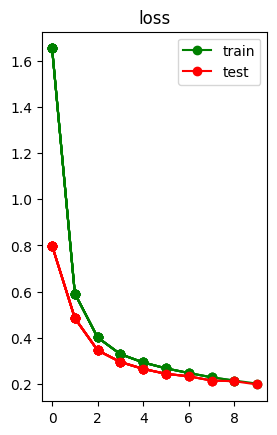

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax0 = fig.add_subplot(title='loss')
train_loop(model, num_epochs, draw_curve)

In [ ]:
# TODO: plot the model complexity graph

### TODO1: Comment the model complexity graph
### TODO2: Change the model and add more layer (use a complex model)

In [29]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 32)
        self.fc2 = nn.Linear(32, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

# Create an instance of the network
model = Net2()
print(model)

Net2(
  (fc1): Linear(in_features=784, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=10, bias=True)
  (relu): ReLU()
)


In [30]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

model = Net3()
print(model)

Net3(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
  (relu): ReLU()
)


In [31]:
class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = F.log_softmax(x, dim=1)
        return x

model = Net4()
print(model)

Net4(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
  (relu): ReLU()
)


In [ ]:
def train_loop(model, num_epochs, current_layer, train_loader, test_loader):
  for epoch in range(num_epochs):
    train_model(model, epoch, num_epochs-1, train_loader)
    evaluate_model(model, epoch, num_epochs-1, test_loader)
    draw_curve_complexity_vs_loss(n_layer, current_layer, training_loss, testing_loss)

  print("Training is finished!")

In [ ]:
def draw_curve_complexity_vs_loss(n_layer, current_layer, training_loss, testing_loss):
  n_layer.append(current_layer)
  ax0.legend()
  ax0.plot(n_layers, training_loss, label='train', color='green')
  ax0.plot(n_layers, testing_loss, label='test', color='red')

In [ ]:
n_layer = []

In [ ]:
models = [Net(), Net2(), Net3(), Net4()]
for model in models:
  training_loss = []
  testing_loss = []
  current_layer = 2
  train_loop(model, 10, current_layer, train_loader, test_loader)
  current_layer += 1

Epoch 1, Loss: 2.4353397024719956
 Loss: 2.4408606495826866
Epoch 2, Loss: 2.4353065627978556
 Loss: 2.4408606495826866
Epoch 3, Loss: 2.4353179461412084
 Loss: 2.4408606495826866
Epoch 4, Loss: 2.435369971972793
 Loss: 2.4408606495826866
Epoch 5, Loss: 2.435271861202427
 Loss: 2.4408606495826866
Epoch 6, Loss: 2.435349471787654
 Loss: 2.4408606495826866
Epoch 7, Loss: 2.435333879517594
 Loss: 2.4408606495826866


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def create_and_train_model(model):
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()

    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Evaluation on the test_loader
        test_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

        test_losses.append(test_loss / len(test_loader))

    return train_losses, test_losses

# Vary the model complexity (number of hidden units) for the graph
models = [Net(), Net2(), Net3(), Net4()]

# Plot the model complexity graph
plt.figure(figsize=(10, 6))

for model in models:
    train_losses, test_losses = create_and_train_model(model)
    plt.plot(test_losses, label=f"Model: {type(model).__name__}")

plt.title("Model Complexity Graph")
plt.xlabel("Epoch")
plt.ylabel("Test Loss")
plt.legend()
plt.show()


## Implementing Early Stopping 🛑

One of the key techniques in training neural networks effectively is 'Early Stopping'. This technique halts the training process if the model performance stops improving on a held-out validation set. Early stopping is a form of regularization used to avoid overfitting.

### Key Concepts:
- **Validation Loss**: Monitor the loss on a validation set to detect when it begins to increase, indicating overfitting.

In [ ]:
# TODO: Complete this code to implement Early stopping
patience = 3
min_delta = 0.01
best_loss = None
patience_counter = 0
validation_loader = test_loader

# Training loop with early stopping
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

    # evaluation phase
    model.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for images, labels in validation_loader:
            output = model(images)
            loss = criterion(output, labels)
            validation_loss += loss.item()

    # Calculate average losses
    training_loss = running_loss / len(train_loader)
    validation_loss /= len(validation_loader)

    print(f"Epoch {epoch+1}, Training Loss: {training_loss}, Validation Loss: {validation_loss}")

    # Early stopping logic
    if best_loss is None or validation_loss < best_loss - min_delta:
        best_loss = validation_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!")
            break

print("Training is finished!")

In [ ]:
# TODO: Answer this questions
# What does min_delta and patience refer to ?
# Min delta: represents the value of negative change that can be tolerated from one epoch to another.
# Patience: refers to the number of epochs with no improvement in the training after which the training will be stopped.
# What is different from the first training ?
# The training stopped earlier.
# It stopped earlier.

## Experimenting with Dropout 🌧️

Dropout is a regularization technique that temporarily drops units (along with their connections) from the neural network during training. This prevents units from co-adapting too much and helps the model to generalize better to unseen data.

### Key Concepts:
- **Dropout Rate**: The probability of a neuron being dropped during training. Common rates are 0.2, 0.5, etc.
- **Generalization**: Dropout improves the generalization of the model on the test data.


In [ ]:
class NetWithDropout(nn.Module):
    def __init__(self):
        super(NetWithDropout, self).__init__()
        # Define layers of the neural network
        self.fc1 = nn.Linear(28 * 28, 128)
        self.dropout1 = nn.Dropout(p=0.2)  # Dropout layer with 20% probability
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)  # Dropout layer with 50% probability
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(-1, 28 * 28)
        # Forward pass with dropout
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Create an instance of the network with dropout
model_with_dropout = NetWithDropout()
print(model_with_dropout)

NetWithDropout(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
# TODO: Train the dropout model
# What do you notice ?

## Submitting Your Project on GitHub 🚀

Submitting your project on GitHub not only allows you to showcase your work but also helps in version control and collaboration. Here's how you can do it:

### Step 1: Create a New Repository on GitHub
1. **Sign in to GitHub**: Go to [GitHub](https://github.com) and sign in with your account.
2. **Create a New Repository**: Click on the '+' icon in the top right corner and select 'New repository'.
3. **Name Your Repository**: Give your repository a meaningful name, like 'handwritten-digit-recognition'.
4. **Initialize with a README**: Check the box 'Initialize this repository with a README'.
5. **Create Repository**: Click the 'Create repository' button.

### Step 2: Clone the Repository to Your Local Machine
1. **Copy the Repository URL**: On your repository page on GitHub, click the 'Code' button and copy the URL.
2. **Clone in Terminal**: Open your terminal, navigate to where you want the repository, and run `git clone [URL]`, replacing `[URL]` with the URL you copied.

### Step 3: Add Your Project to the Repository
1. **Copy Your Notebook**: Place your Jupyter notebook file into the cloned repository folder on your local machine.
2. **Add the File**: Run `git add [filename]` in your terminal, replacing `[filename]` with the name of your notebook file.

### Step 4: Commit and Push Your Changes
1. **Commit Your Changes**: Run `git commit -m "Add project notebook"`.
2. **Push to GitHub**: Run `git push` to push your changes to the GitHub repository.

### Step 5: Create and Edit the README File
1. **Edit README.md**: On GitHub, open the README.md file and click the pencil icon to edit.
2. **Write Your README**: Include a project title, a brief description, installation instructions, and usage instructions. Optionally, add screenshots or additional sections as needed.
3. **Save Changes**: After editing, commit your changes by clicking 'Commit changes' at the bottom.

### 📌 TODOs for Submission:
- Ensure your Jupyter notebook is well-commented and formatted.
- Write a clear, concise README that effectively describes your project.
- Double-check that all files have been committed and pushed to your GitHub repository.

---

Remember, a well-documented GitHub repository not only reflects your technical skills but also your ability to communicate and present your work effectively. Happy coding and best of luck with your project submission! 🌟👩‍💻👨‍💻
